In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import matplotlib.patches as mpatches 
import time
import json
import random
import openweathermapy.core as owm
import seaborn as sns
from scipy.stats import linregress
import os
from config import api_key
from citipy import citipy
from urllib.error import HTTPError
from urllib.parse import quote_plus
from datetime import datetime

# Import API key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

Perform API Calls

Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it'sbeing processed (with the city number and city name).

In [ ]:
# set lists for the dataframe

city_two = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Convert Raw Data to DataFrame

Export the city data into a .csv. Display the DataFrame

In [ ]:
# create dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [ ]:
# create dataframe
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

In [ ]:
# output data to csv
weather_dataframe.to_csv('output_data/cities.csv')

In [44]:
# This code is here so that I can continue to tweak my graphs and the rest of my code without doing a new api call every time
weather_dataframe = pd.read_csv('output_data/cities.csv')

In [45]:
weather_dataframe.count()

Unnamed: 0    562
City          562
Cloudiness    562
Country       557
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [46]:
weather_dataframe.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,hvide%20sande,87,DK,1579932187,100,56.00,8.13,43.00,6.93
1,1,camana,100,PE,1579932095,86,-16.62,-72.71,66.47,2.21
2,2,mataura,71,NZ,1579932187,60,-46.19,168.86,66.00,10.00
3,3,brae,100,GB,1579932187,87,60.40,-1.35,46.40,26.40
4,4,chokurdakh,18,RU,1579932187,95,70.63,147.92,-35.27,1.97


Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. Save the plotted figures as .pngs.


In [47]:
# switches to seaborn default display
sns.set()

In [48]:
# gets current date
cur_date = datetime.now()                                                    

Latitude vs. Temperature Plot

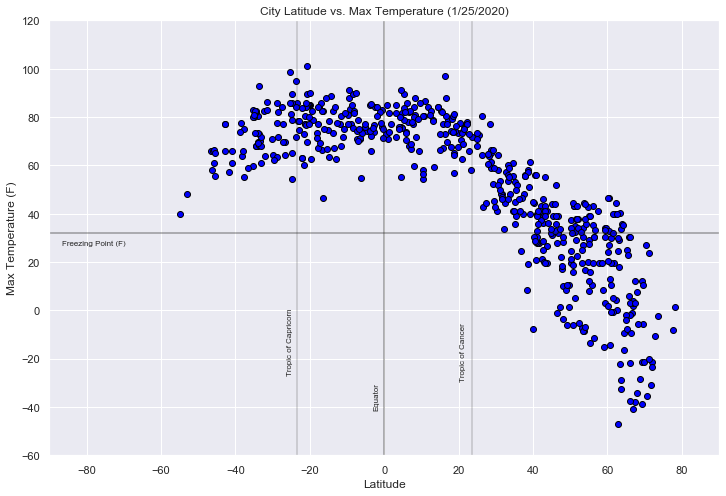

In [50]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Max Temp'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-60, 120)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.axhline(32, c='k', alpha=.4)
plt.title('City Latitude vs. Max Temperature (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.gcf().text(.14, .49, 'Freezing Point (F)', fontsize=8, rotation='horizontal')
plt.savefig("figures/fig1.png")
plt.show()                                                                  

Latitude vs. Humidity Plot

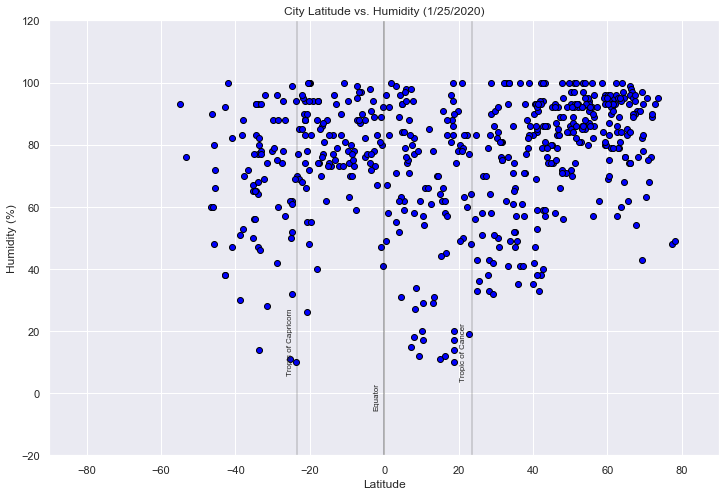

In [51]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Humidity'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Humidity (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("figures/fig2.png")
plt.show() 

Latitude vs. Cloudiness

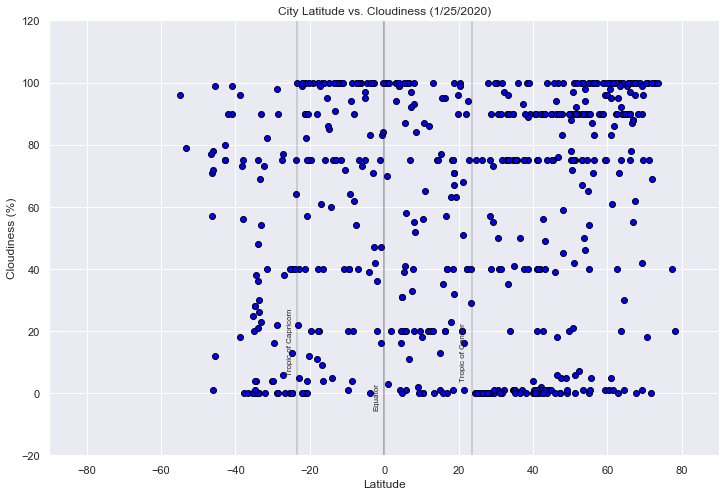

In [52]:
# create graph
plt.figure(figsize = (12, 8))                                               
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Cloudiness'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Cloudiness (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("figures/fig3.png")
plt.show()                                                                  

Latitude vs. Wind Speed

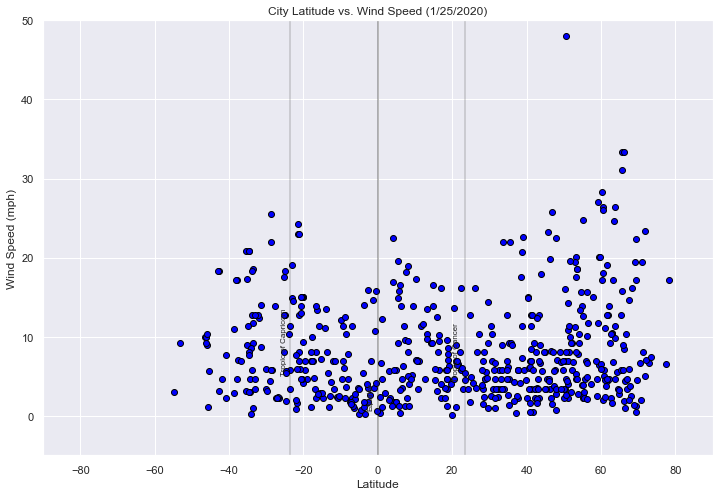

In [53]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Wind Speed'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Wind Speed (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("figures/fig4.png")
plt.show()  

In [54]:
# create dataframe for all the cities
weather_dataframe['temp_v'] = "xkcd:dark purple"                                     
weather_dataframe.loc[weather_dataframe['Max Temp'] > 0, 'temp_v'] = "xkcd:violet"           
weather_dataframe.loc[weather_dataframe['Max Temp'] > 10, 'temp_v'] = "xkcd:indigo blue"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 20, 'temp_v'] = "xkcd:blue"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 30, 'temp_v'] = "xkcd:green"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 40, 'temp_v'] = "xkcd:sea green"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 50, 'temp_v'] = "xkcd:yellow green"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 60, 'temp_v'] = "xkcd:yellow"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 70, 'temp_v'] = "xkcd:orange"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 80, 'temp_v'] = "xkcd:reddish orange"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 90, 'temp_v'] = "xkcd:red"

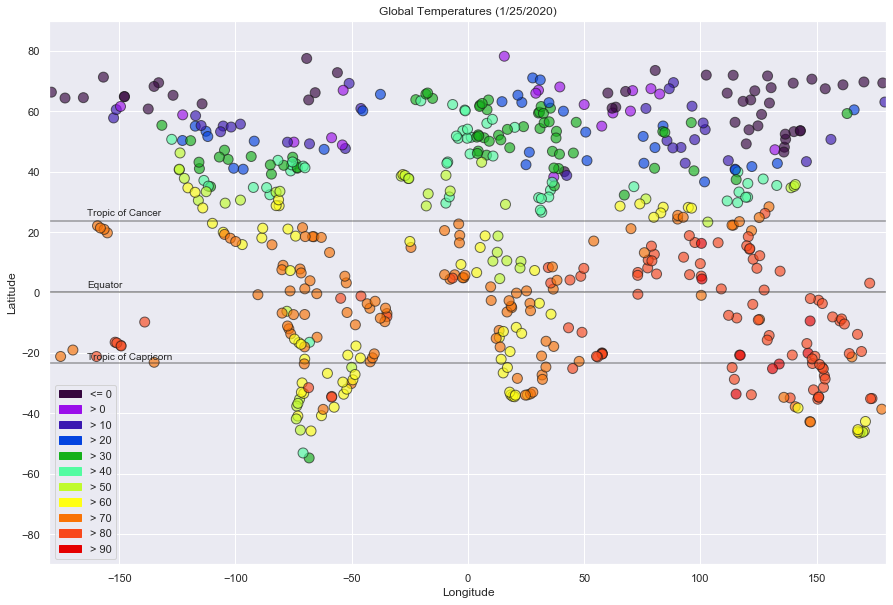

In [55]:
# create graph
fig = plt.figure(figsize=(15,10))                                           
ax = fig.add_subplot(1,1,1)
ax.scatter(weather_dataframe['Lng'], weather_dataframe['Lat'], color=weather_dataframe["temp_v"], s=100,  alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Temperatures (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

templt0 = mpatches.Patch(color='xkcd:dark purple', label='<= 0')
tempgt0 = mpatches.Patch(color='xkcd:violet', label='> 0')
tempgt10 = mpatches.Patch(color='xkcd:indigo blue', label='> 10')
tempgt20 = mpatches.Patch(color='xkcd:blue', label='> 20')
tempgt30 = mpatches.Patch(color='xkcd:green', label='> 30')
tempgt40 = mpatches.Patch(color='xkcd:sea green', label='> 40')
tempgt50 = mpatches.Patch(color='xkcd:yellow green', label='> 50')
tempgt60 = mpatches.Patch(color='xkcd:yellow', label='> 60')
tempgt70 = mpatches.Patch(color='xkcd:orange', label='> 70')
tempgt80 = mpatches.Patch(color='xkcd:reddish orange', label='> 80')
tempgt90 = mpatches.Patch(color='xkcd:red', label='> 90')

plt.legend(handles=[templt0,
                    tempgt0,
                    tempgt10,
                    tempgt20,
                    tempgt30,
                    tempgt40,
                    tempgt50,
                    tempgt60,
                    tempgt70,
                    tempgt80,
                    tempgt90], frameon=True, loc="lower left")
plt.savefig("figures/fig5.png")
plt.show()                                                                   # displays plot

Create a function to create Linear Regression plots Create Northern and Southern Hemisphere DataFrames

In [56]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

Regression line equation is: y = -1.31x + 91.62
The r-squared is: -0.8632118353474495
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


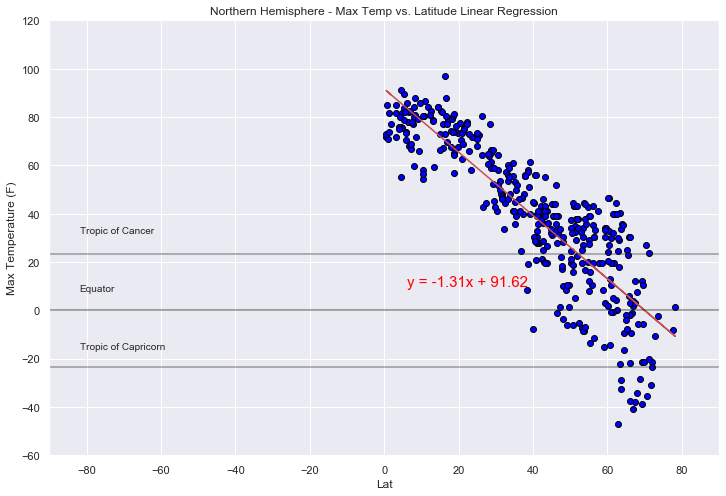

In [57]:
# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("figures/fig6.png")
plt.show()

Regression line equation is: y = -1.31x + 91.62
The r-squared is: -0.8632118353474495
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.

Regression line equation is: y = 0.27x + 81.19
The r-squared is: 0.35667449681384045
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


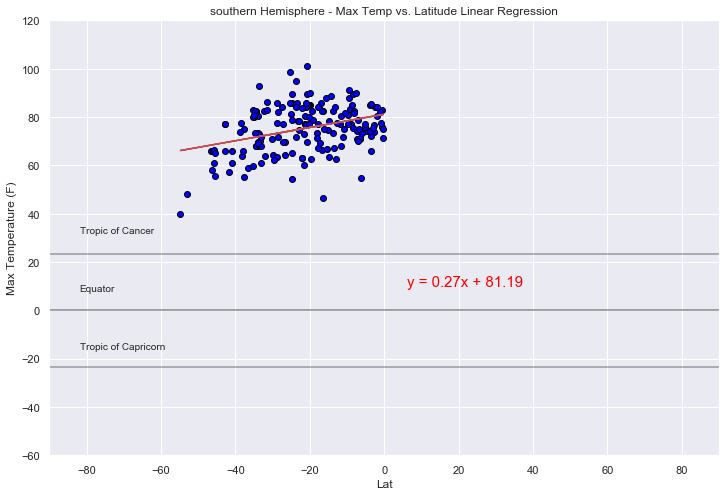

In [58]:
# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("figures/fig7.png")
plt.show()

Regression line equation is: y = 0.27x + 81.19
The r-squared is: 0.35667449681384045
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.

Regression line equation is: y = 0.38x + 61.02
The r-squared is: 0.3736191780533146
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the humidity decreases.


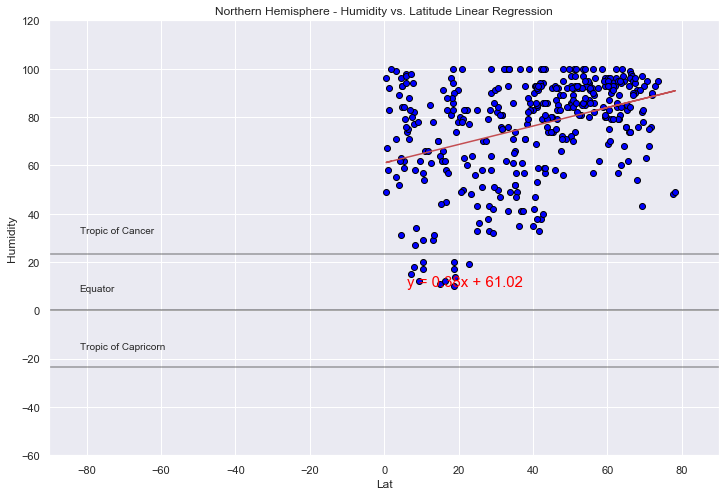

In [59]:
# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the humidity decreases.")
plt.savefig("figures/fig8.png")
plt.show()

Regression line equation is: y = 0.38x + 61.02
The r-squared is: 0.3736191780533146
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the humidity decreases.

Regression line equation is: y = 0.37x + 82.99
The r-squared is: 0.25876119317942975
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the humidity decreases.


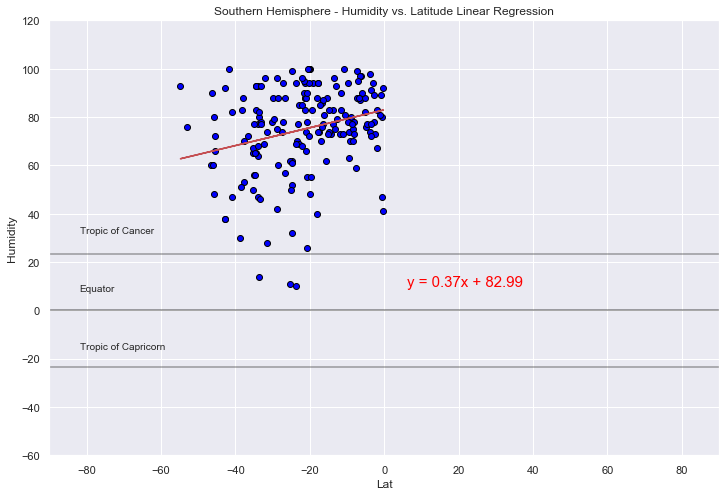

In [60]:
# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the humidity decreases.")
plt.savefig("figures/fig9.png")
plt.show()

Regression line equation is: y = 0.37x + 82.99
The r-squared is: 0.25876119317942975
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the humidity decreases.

Regression line equation is: y = 0.43x + 42.2
The r-squared is: 0.22875666737600409
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the cloudiness decreases.


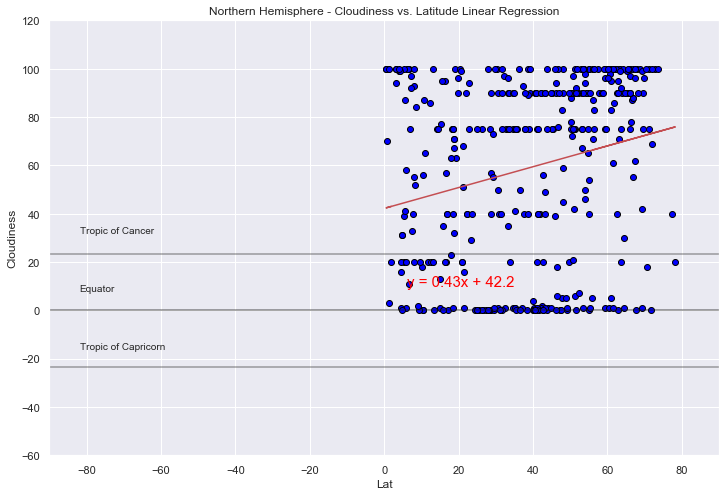

In [61]:
# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the cloudiness decreases.")
plt.savefig("figures/fig10.png")
plt.show()

Regression line equation is: y = 0.43x + 42.2
The r-squared is: 0.22875666737600409
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the cloudiness decreases.

Regression line equation is: y = 0.65x + 68.81
The r-squared is: 0.2264539842391651
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the cloudiness decreases.


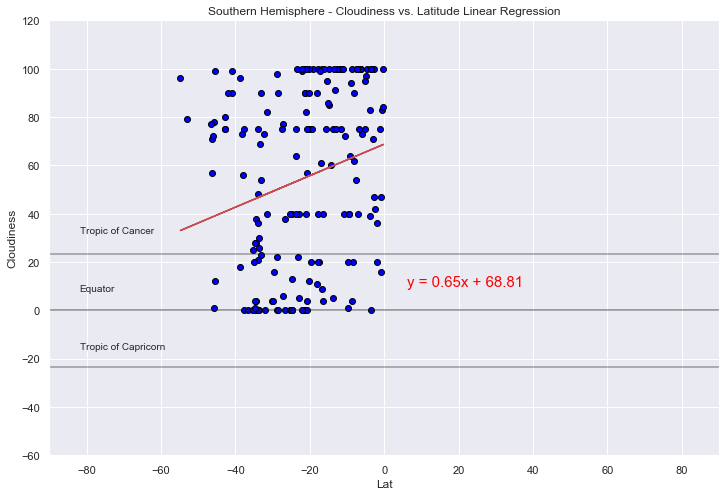

In [62]:
# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the cloudiness decreases.")
plt.savefig("figures/fig11.png")
plt.show()

Regression line equation is: y = 0.65x + 68.81
The r-squared is: 0.2264539842391651
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the cloudiness decreases.

Regression line equation is: y = 0.06x + 5.75
The r-squared is: 0.18641389343888476
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the wind speed decreases.


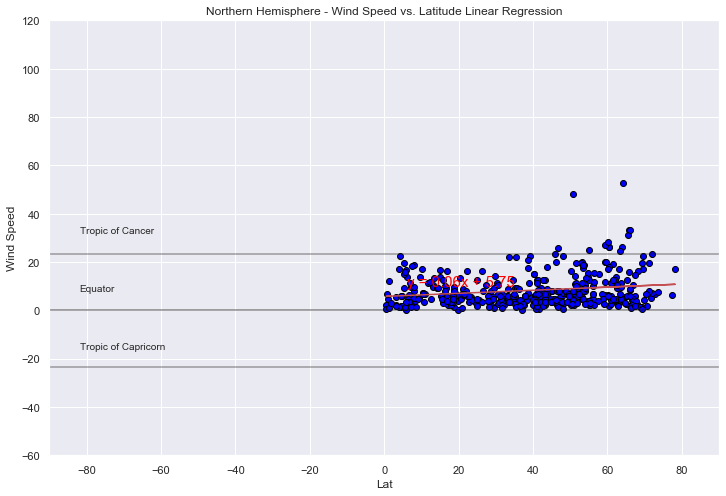

In [63]:
# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the wind speed decreases.")
plt.savefig("figures/fig12.png")
plt.show()

Regression line equation is: y = 0.06x + 5.75
The r-squared is: 0.18641389343888476
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the wind speed decreases.

Regression line equation is: y = -0.11x + 5.48
The r-squared is: -0.2489475576892535
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the wind speed decreases.


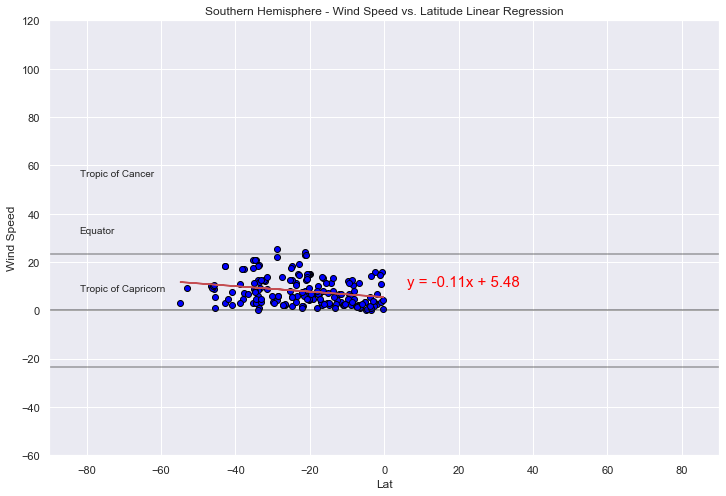

In [64]:
# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the wind speed decreases.")
plt.savefig("figures/fig13.png")
plt.show()

Regression line equation is: y = -0.11x + 5.48
The r-squared is: -0.2489475576892535
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the wind speed decreases.